# Optical Character Recognition (OCR) API demonstration

## Model creation

**IMPORTANT** : to convert the models, `pytorch` should be installed (GPU compatibility is **not** required) : `pip install torch`.

### Scene Text Detection model : EAST

The EAST scene-text detector is inspired from [this pytorch implementation](https://github.com/SakuraRiven/EAST). On the repo, the `east_vgg16.pth` file can be downloaded, then it should be placed it in the `pretrained_models/pretrained_weights` folder ! The below cell automatically converts the `pytorch` checkpoint to a `keras` instance. Check [the detection project](https://github.com/yui-mhcp/detection) for more examples about `EAST` ;)

In [3]:
from models.detection import EAST

detector = EAST(
    nom = 'east', labels = 'text', input_size = (None, None, 3)
)

print(detector)

Initializing model with kwargs : {'architecture': 'EASTVGG', 'input_shape': (None, None, 3), 'output_dim': [1, 4, 1], 'final_activation': ['sigmoid', 'sigmoid', 'sigmoid', 'softmax'], 'final_name': ['score_map', 'geo_map', 'theta_map', 'class_map']}
Weights transfered successfully !
Save `model` to pretrained_models/east/saving/ckpt-0000.weights.h5
EAST `east` initialized successfully !

========== east ==========
Model instance `model`
- Inputs 	: (None, None, None, 3)
- Outputs 	: (None, None, None, 6)
- Number of layers 	: 96
- Number of parameters 	: 15.099 Millions
- Model not compiled yet

Already trained on 0 epochs (0 steps)

- Image size : (None, None, 3)
- Resize config : {'antialias': True}
- Normalization schema : east
- Labels (n = 1) : ['text']



### OCR model : CRNN

The available pretrained models currently come from the `easyocr` open-source library. The library is however not required to be installed as only the checkpoint files are downloaded and converted into a `keras` model !

The full list of available languages / models available in the `custom_architectures/crnn_arch.py` file ;) By default, the below cell loads the `english` pretrained model.

In [2]:
from models.ocr import CRNN

model = CRNN(
    nom = 'crnn_en', lang = 'english', pretrained_lang = 'english'
)

print(model)
model.summary()


========== crnn_en ==========
Model instance `model`
- Inputs 	: (None, 64, None, 1)
- Outputs 	: (None, None, 97)
- Number of layers 	: 33
- Number of parameters 	: 3.778 Millions
- Model not compiled yet

Transfer-learning from : easyocr_english_g2
Already trained on 0 epochs (0 steps)

- Image size : (64, None, 1)
- Resize config : {'method': 'bilinear', 'antialias': True, 'pad_mode': 'repeat_last', 'preserve_aspect_ratio': True, 'manually_compute_ratio': True, 'target_multiple_shape': 64}
- Normalization schema : easyocr
- Language : english
- Vocabulary (size = 97) : ['<blank>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', ...]



Model: "CRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 64, None, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 66, None, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_0 (Conv2D)                 │ (None, 64, None, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation               │ (None, 64, None, 32)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, None, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 34, None, 32)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 32, None, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_1             │ (None, 32, None, 64)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, None, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 18, None, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_6 (Conv2D)                 │ (None, 16, None, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_2             │ (None, 16, None, 128)  │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 18, None, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_8 (Conv2D)                 │ (None, 16, None, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_3             │ (None, 16, None, 128)  │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, None, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_4                │ (None, 10, None, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_11 (Conv2D)                │ (None, 8, None, 256)   │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ norm_12 (BatchNormalization)    │ (None, 8, None, 256)   │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_4             │ (None, 8, None, 256)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,778,273 (14.41 MB)

 Trainable params: 3,777,249 (14.41 MB)

 Non-trainable params: 1,024 (4.00 KB)

## OCR demonstration

To perform OCR on an image, you simply have to provide the `filename`(s) of the image(s) to the `ocr` method ! Use `help(BaseOCR.predict)` to get the complete list of arguments and configurations ;)

In short : 
- The `model` argument tells which OCR model to use (in this case, the `crnn_en` created above).
  The `detector` argument is equivalent to `model` for the text detection model (e.g., the `east` model created above).
  The `combine` argument controls whether to combine boxes into lines (horizontal fusion) and paragraphs (vertical fusion) before computing caracter recognition. In the below example, the combination would group "Severins" with "brücke" as paragraphs (i.e. 2 lines) and "Im" and "Sionstat" as a single line. The OCR is only performed on lines, paragraphs are simply grouped lines with a "\n" between each line. 

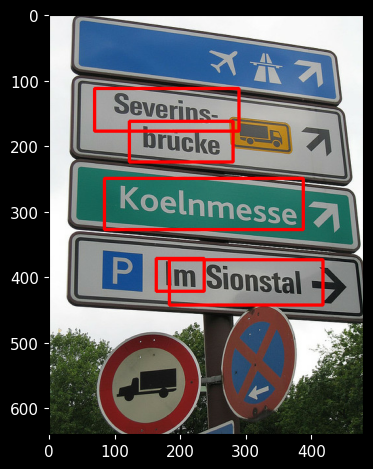

Text (score [-0.066]) : ~Severins- 


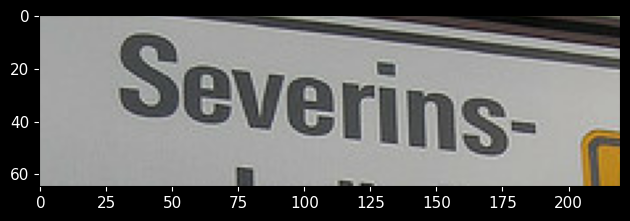

Text (score [-0.039]) : ~briicke _


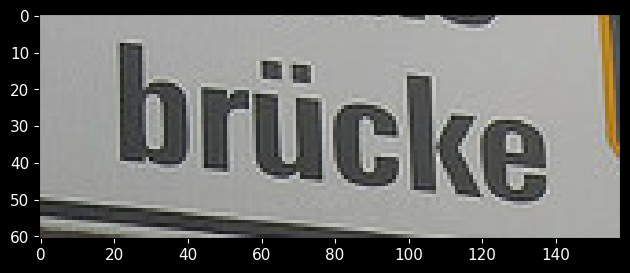

Text (score [-0.]) : Koelnmesse


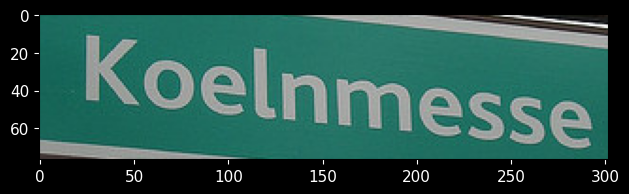

Text (score [-0.]) : Im Sionstal =


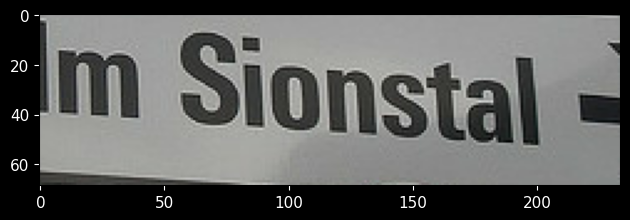

Text (score [-0.005]) : Im


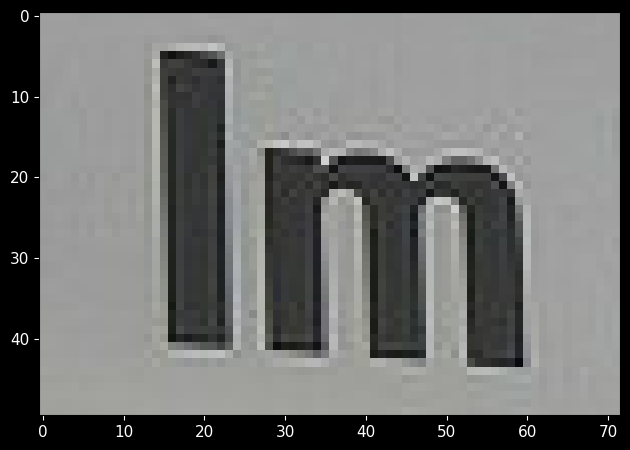

In [2]:
from models.ocr import ocr

filename = 'text.jpg'

result = ocr(filename, model = 'crnn_en', detector = 'east', save = False, display = True, combine = False)